In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

# Step 1: Scraping

## Collect coke price data

In [2]:
coke_url = "https://www.globalproductprices.com/rankings/coca_cola_price/"
raw_html = requests.get(coke_url).content

In [3]:
coke_doc = BeautifulSoup(raw_html, "html.parser")
print(type(coke_doc))
print(coke_doc.prettify())

<class 'bs4.BeautifulSoup'>
<!DOCTYPE html>
<html lang="en" xml:lang="en" xmlns="https://www.w3.org/1999/xhtml">
 <head>
  <meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=0" name="viewport"/>
  <link href="https://www.globalproductprices.com/rankings/coca_cola_price/" rel="canonical"/>
  <link href="https://www.globalproductprices.com/rankings/coca_cola_price/" hreflang="en" rel="alternate"/>
  <link href="https://es.globalproductprices.com/rankings/coca_cola_price/" hreflang="es" rel="alternate"/>
  <link href="https://de.globalproductprices.com/rankings/coca_cola_price/" hreflang="de" rel="alternate"/>
  <link href="https://pt.globalproductprices.com/rankings/coca_cola_price/" hreflang="pt" rel="alternate"/>
  <link href="https://ru.globalproductprices.com/rankings/coca_cola_price/" hreflang="ru" rel="alternate"/>
  <link href="https://bg.globalproductprices.com/rankings/coca_cola_price/" hreflang="bg" rel="alternate"/>
  <link href="https://fr.glob

In [4]:
coke_table = coke_doc.find_all("table")[0]
coke_table

<table class="sortable" id="benchmarkTable">
<thead>
<tr style="height: 40px;">
<th style="width: 250px">
<span>Countries</span>
</th>
<th style="width: 350px">
								Coca-Cola prices, 0.5 liter
							</th>
<th style="width: 125px">
<span>Rank</span>
</th>
</tr>
</thead>
<tbody>
<tr>
<td>
<a class="graph_outside_link" href="/Norway/coca_cola_price/" id="Norway_l">Norway</a>

</td>
<td>2.52
							</td>
<td>1
							</td>
</tr>
<tr>
<td>
<a class="graph_outside_link" href="/Finland/coca_cola_price/" id="Finland_l">Finland</a>

</td>
<td>2.49
							</td>
<td>2
							</td>
</tr>
<tr>
<td>
<a class="graph_outside_link" href="/Denmark/coca_cola_price/" id="Denmark_l">Denmark</a>

</td>
<td>2.41
							</td>
<td>3
							</td>
</tr>
<tr>
<td>
<a class="graph_outside_link" href="/Israel/coca_cola_price/" id="Israel_l">Israel</a>

</td>
<td>2.33
							</td>
<td>4
							</td>
</tr>
<tr>
<td>
<a class="graph_outside_link" href="/Australia/coca_cola_price/" id="Australia_l">Australia</a>



In [5]:
rows = coke_table.find_all("tr")

In [6]:
first_cell = coke_table.find_all("tr")[1]
first_cell

<tr>
<td>
<a class="graph_outside_link" href="/Norway/coca_cola_price/" id="Norway_l">Norway</a>

</td>
<td>2.52
							</td>
<td>1
							</td>
</tr>

In [7]:
# Find country name
first_cell.a.string

'Norway'

In [8]:
# Find coke price
first_cell.find_all("td")[1].string.strip()

'2.52'

In [9]:
coke_df = pd.DataFrame(columns=['country', 'price'])

In [10]:
# Collecting data
for row in rows[1:]:    
    country = row.a.string.strip()
    price = row.find_all("td")[1].string.strip()
    coke_df = coke_df.append({'country': country,  'price': price}, ignore_index=True)

/var/folders/0h/2v5mxpvs49s0_gs3lqjt474h0000gn/T/ipykernel_44088/2223115456.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coke_df = coke_df.append({'country': country,  'price': price}, ignore_index=True)
/var/folders/0h/2v5mxpvs49s0_gs3lqjt474h0000gn/T/ipykernel_44088/2223115456.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coke_df = coke_df.append({'country': country,  'price': price}, ignore_index=True)
/var/folders/0h/2v5mxpvs49s0_gs3lqjt474h0000gn/T/ipykernel_44088/2223115456.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coke_df = coke_df.append({'country': country,  'price': price}, ignore_index=True)
/var/folders/0h/2v5mxpvs49s0_gs3lqjt474h0000gn/T/ipykernel_44088/2223115456.py:5: FutureWarning: The

In [11]:
coke_df.head(2)

,country,price
0,Norway,2.52
1,Finland,2.49


## Collect salary data

In [12]:
salary_url = "https://www.numbeo.com/cost-of-living/country_price_rankings?itemId=105"
salary_html = requests.get(salary_url).content
salary_doc = BeautifulSoup(salary_html, "html.parser")
print(type(salary_doc))
print(salary_doc.prettify())

<class 'bs4.BeautifulSoup'>
<!DOCTYPE html>
<html lang="en-US">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <script defer="" src="https://www.numbeo.com/common/numbeo_standard.js">
  </script>
  <link href="https://cdnjs.cloudflare.com/ajax/libs/jqueryui/1.10.3/themes/redmond/jquery-ui.min.css" rel="Stylesheet"/>
  <link href="https://www.numbeo.com/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <script defer="" src="https://cdnjs.cloudflare.com/ajax/libs/jquery/1.10.2/jquery.min.js">
  </script>
  <script defer="" src="https://cdnjs.cloudflare.com/ajax/libs/jqueryui/1.10.3/jquery-ui.min.js">
  </script>
  <script src="https://www.gstatic.com/charts/loader.js">
  </script>
  <link href="https://www.numbeo.com/images/apple-touch-icon.png" rel="apple-touch-icon"/>
  <script>
   if (typeof whenDocReady === "function") {
    // already declared, do nothing
  } else {
    function whenDocReady(fn) {
      // see if DOM is already available
    

In [13]:
salary_table = salary_doc.find_all("table")[1]
salary_rows = salary_table.find_all("tr")
salary_rows

[<tr class="tr_standard"><td style="white-space: nowrap; vertical-align: top">
 1.
 </td><td style="vertical-align: top">
 Switzerland</td><td style="width: 200px; vertical-align: middle">
 <span style="display: inline-block; width: 100%; background-color: #7070ff; height: 0.7em;"></span></td><td style="vertical-align: top; text-align: right">
 5,901.81 $</td></tr>,
 <tr class="tr_standard"><td style="white-space: nowrap; vertical-align: top">
 2.
 </td><td style="vertical-align: top">
 Singapore</td><td style="width: 200px; vertical-align: middle">
 <span style="display: inline-block; width: 84%; background-color: #7070ff; height: 0.7em;"></span></td><td style="vertical-align: top; text-align: right">
 4,935.40 $</td></tr>,
 <tr class="tr_standard"><td style="white-space: nowrap; vertical-align: top">
 3.
 </td><td style="vertical-align: top">
 United States</td><td style="width: 200px; vertical-align: middle">
 <span style="display: inline-block; width: 71%; background-color: #7070ff

In [14]:
# Find country name
salary_rows[0].find_all("td")[1].string.strip()

'Switzerland'

In [15]:
# find monthly income
salary_rows[0].find_all("td")[3].string.strip().replace(u'\xa0', u' ')

'5,901.81 $'

In [16]:
salary_df = pd.DataFrame(columns=['country', 'monthly_salary'])

In [17]:
# Collecting data
for row in salary_rows:    
    country = row.find_all("td")[1].string.strip()
    salary = row.find_all("td")[3].string.strip().replace(u'\xa0', u' ')
    salary_df = salary_df.append({'country': country,  'monthly_salary': salary}, ignore_index=True)

/var/folders/0h/2v5mxpvs49s0_gs3lqjt474h0000gn/T/ipykernel_44088/2391781885.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  salary_df = salary_df.append({'country': country,  'monthly_salary': salary}, ignore_index=True)
/var/folders/0h/2v5mxpvs49s0_gs3lqjt474h0000gn/T/ipykernel_44088/2391781885.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  salary_df = salary_df.append({'country': country,  'monthly_salary': salary}, ignore_index=True)
/var/folders/0h/2v5mxpvs49s0_gs3lqjt474h0000gn/T/ipykernel_44088/2391781885.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  salary_df = salary_df.append({'country': country,  'monthly_salary': salary}, ignore_index=True)
/var/folders/0h/2v5mxpvs49s0_gs3lqjt474h0000gn/T/ipykernel

In [18]:
salary_df.head(2)

,country,monthly_salary
0,Switzerland,"5,901.81 $"
1,Singapore,"4,935.40 $"


In [19]:
salary_df.to_csv("salary.csv",index=False)

In [20]:
world_bank_df = pd.read_csv('monthly-wage-world-bank.csv')
world_bank_df.head(2)

,ref_area.label,indicator.label,source.label,sex.label,classif1.label,classif2.label,time,obs_value,obs_status.label,note_classif.label,note_indicator.label,note_source.label
0,Afghanistan,Average monthly earnings of employees by sex a...,LFS - Labour Force Survey,Sex: Total,Occupation (Skill level): Total,Currency: U.S. dollars,2020,171.87,NaN,NaN,Currency: AFG - Afghani (AFN),Repository: ILO-STATISTICS - Micro data proces...
1,Albania,Average monthly earnings of employees by sex a...,ADM-IR - General Directorate of Taxation,Sex: Total,Occupation (Skill level): Total,Currency: U.S. dollars,2020,493.90,NaN,NaN,Currency: ALB - Lek (ALL) | Working time arran...,Reference group coverage: Insured persons


In [21]:
wage_df=world_bank_df[['ref_area.label','time','obs_value']]

# Step 2: Cleaning

## Cleaning country names

In [42]:
# Merging datasets
merged = pd.merge(coke_df, salary_df, how="left", on="country")

In [48]:
# Filtering out rows in which country name was not matched
merged[merged.monthly_salary.isna()]

,country,price,monthly_salary
7,UK,1.97,NaN
20,Luxembourg,1.24,NaN
23,Hong Kong,1.15,NaN
25,Czechia,1.14,NaN
27,Macao,1.12,NaN
39,UA Emirates,0.95,NaN
49,Uganda,0.79,NaN
51,USA,0.76,NaN
53,Paraguay,0.73,NaN
57,Zambia,0.66,NaN


In [49]:
# Fixing country names
salary_df = salary_df.replace(' [(]China[)]','',regex=True)

coke_df = coke_df.replace({ 'UK' : "United Kingdom",
                                'Czechia' : 'Czech Republic',
                                'UA Emirates' : 'United Arab Emirates',
                               'USA':'United States',
                               'Domin. Rep.':'Dominican Republic',}
                          ,regex=True)


In [50]:
final_df = pd.merge(coke_df, salary_df, how="left", on="country")
final_df.head(2)

,country,price,monthly_salary
0,Norway,2.52,"3,420.36 $"
1,Finland,2.49,"2,769.78 $"


In [51]:
cleaned_df = final_df.replace({' [$]':'',',':''},regex=True)

In [52]:
cleaned_df.head()

,country,price,monthly_salary
0,Norway,2.52,3420.36
1,Finland,2.49,2769.78
2,Denmark,2.41,3526.72
3,Israel,2.33,2642.97
4,Australia,2.23,3832.35


In [53]:
cleaned_df['monthly_salary']=cleaned_df['monthly_salary'].astype(float)
cleaned_df['price']=cleaned_df['price'].astype(float)


# Step 3: Data Analysis

In [54]:
cleaned_df['bottle_per_day'] = cleaned_df['monthly_salary']/cleaned_df['price']/30
cleaned_df['bottle_per_day'] = cleaned_df['bottle_per_day'].round()
cleaned_df.head()

,country,price,monthly_salary,bottle_per_day
0,Norway,2.52,3420.36,45.0
1,Finland,2.49,2769.78,37.0
2,Denmark,2.41,3526.72,49.0
3,Israel,2.33,2642.97,38.0
4,Australia,2.23,3832.35,57.0


In [55]:
cleaned_df.sort_values(by=['bottle_per_day'], ascending=False).dropna().head(10)

,country,price,monthly_salary,bottle_per_day
85,Kuwait,0.36,2079.49,193.0
51,United States,0.76,4177.35,183.0
42,Qatar,0.88,3991.81,151.0
29,Singapore,1.10,4935.40,150.0
12,Switzerland,1.45,5901.81,136.0
39,United Arab Emirates,0.95,3558.21,125.0
67,Bahrain,0.56,2076.09,124.0
82,China,0.37,1098.73,99.0
47,Oman,0.82,2083.19,85.0
32,Japan,1.04,2586.45,83.0


In [56]:
cleaned_df.to_csv("merged.csv",index=False)

<AxesSubplot: ylabel='country'>

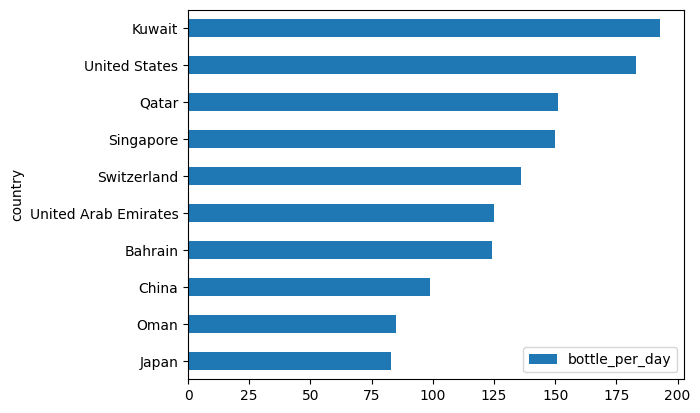

In [57]:
cleaned_df.sort_values(by='bottle_per_day').dropna().tail(10)\
    .plot(kind='barh',ylabel='country',y='bottle_per_day',x='country')